In [18]:
# Import libraries
import matplotlib.pyplot as plt
import random

In [19]:
# Node Class
class Node ():
    def __init__(self, parent = None, position = None, direction = None):
        self.parent = parent
        self.position = position
        self.direction = direction
        
        self.g = 0
        self.h = 0
        self.f = 0
        self.t = 0 # turning cost
    
    def __eq__(self, other):
        return self.position == other.position

In [20]:
# calculate turning cost
# note: down: x positive, right: y positive 
# global variable

iteration_count = 0

In [21]:
# A Star Algorithm
# Assumption:
# Maximum speed value: 2m/s
# Size grid element: 2m
# Maximum rotation speed: pi/2 (or 90 degrees)
# Starting position rotation: 0
# AGVs will not turn 180 degree

# Improves A* algorithm: use movement keyword to search faster 

def astar(maze, start, end, turning): # 0: no turning cost, 1: turning cost is considered
    STEP_COST = 1
    
    start_node = Node(None, start, (-1, 0)) #The AGV is facing down 
    start_node.g = start_node.f = start_node.h = start_node.t = 0
    
    end_node = Node(None, end) 
    end_node.g = end_node.h = end_node.f = end_node.t= 0
    
    open_list = []
    closed_list = []
    
    open_list.append(start_node)
    
    # start the searching loop
    while len(open_list) > 0:
        # get the current node (with the least f score)
        current_node = open_list[0]
        current_index = 0
        
        for index, node in enumerate(open_list):
            if node.f < current_node.f:
                current_node = node
                current_index = index
        
        # pop the current node out of the open list and add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)
        
        # check if the current node is the goal
        if current_node == end_node:
            path = [] # contain the path from start to end node
            
            while current_node is not None:
                
                path.append(current_node.position)
                current_node = current_node.parent
                
            return path[::-1]
        
        # Generate neighbor nodes from current node
        neighbors = []
    
        
        for new_position in [(0, 1),(0, -1),(1, 0),(-1, 0)]:
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            
            # check if the new node is out of bound
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue
            
            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue
            
            # Create new node
            new_node = Node(current_node, node_position, new_position) # New position is add for the current direction of that node

            neighbors.append(new_node)
            

        # Loop through children
        for neighbor in neighbors:
            if neighbor in closed_list:
                continue
            
            # Create the f, g, t and h values
            
            # Calculate turning cost 
            if (current_node.direction == neighbor.direction):
                neighbor.t = 0
            else: 
                neighbor.t = 1
                
            neighbor.g = current_node.g + STEP_COST
            neighbor.h = ((neighbor.position[0] - end_node.position[0])**2 + (neighbor.position[1] - end_node.position[1])**2)**0.5
            if (turning == 0):
                neighbor.f = neighbor.g + neighbor.h 
            else:
                neighbor.f = neighbor.g + neighbor.h + neighbor.t
                    
            # Skip if the neighbor is in the open list with a higher or equal f value
            if any(
                neighbor.position == open_node.position and neighbor.f >= open_node.f
                for open_node in open_list
            ):
                continue
                
            open_list.append(neighbor)
            
    return None # if no path is found

In [22]:
def turns_counter(path):
    if len(path) < 3:
        return 0  # Not enough points to form a turn

    turns = 0

    for i in range(1, len(path) - 1):
        # Get the current point and the previous and next points
        p_prev = path[i - 1]
        p_curr = path[i]
        p_next = path[i + 1]

        # Calculate directions
        direction1 = (p_curr[0] - p_prev[0], p_curr[1] - p_prev[1])  # Direction from previous to current
        direction2 = (p_next[0] - p_curr[0], p_next[1] - p_curr[1])  # Direction from current to next

        # Check if the direction has changed
        if direction1 != direction2:
            turns += 1

    return turns 

In [60]:
def generate_random(map, times): #times: how many random start-end points to generate?
    result_list = []
    
    count = 0
    # random start and end point
    while count < times:
        start_x = random.randint(0, len(map) - 1)  
        start_y = random.randint(0, len(map) - 1) 

        end_x = random.randint(0, len(map) - 1) 
        end_y = random.randint(0, len(map) - 1) 

        if not (start_x == end_x and start_y == end_y):
            start_point = (start_x, start_y)
            end_point = (end_x, end_y)
            
            path_no_turn = astar(map, start_point, end_point, 0)
            path_turn = astar(map, start_point, end_point, 1)
            
            print(f'({start_x:<2},{start_y:<2})     ({end_x:<2},{end_y:<2})      {len(path_no_turn) - 1:<5}     {turns_counter(path_no_turn):<5}       {turns_counter(path_turn)}')
            
            result_list.append((len(path_turn) - 1, turns_counter(path_no_turn), turns_counter(path_turn)))
            count += 1
    
    return result_list

In [65]:
# Testing map 
# Size 30x30 with no obstacle for testing 

map = [
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],   
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],   
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],   
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],   
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],   
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],   
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]

print(f'Start       End          Length    No turn     turn')
print("--------------------------------------------------------")


result_list = generate_random(map, 100)


Start       End          Length    No turn     turn
--------------------------------------------------------
(23,24)     (25,19)      7         3           1
(8 ,14)     (10,8 )      8         3           1
(5 ,21)     (9 ,4 )      21        7           2
(21,15)     (9 ,19)      16        8           2
(25,16)     (8 ,10)      23        12          3
(10,13)     (27,0 )      30        26          7
(27,25)     (28,25)      1         0           0
(23,27)     (13,20)      17        14          4
(16,26)     (12,23)      7         6           2
(2 ,10)     (5 ,2 )      11        5           2
(18,15)     (10,28)      21        15          5
(23,8 )     (8 ,20)      27        24          6
(25,21)     (29,3 )      22        7           2
(0 ,25)     (12,4 )      33        23          6
(5 ,23)     (12,22)      8         2           1
(27,14)     (10,18)      21        8           2
(18,28)     (24,15)      19        11          3
(2 ,23)     (1 ,21)      3         1           1
(26,23)  

In [66]:
sorted_list = sorted(result_list)
print(result_list)
print(sorted_list)


[(7, 3, 1), (8, 3, 1), (21, 7, 2), (16, 8, 2), (23, 12, 3), (30, 26, 7), (1, 0, 0), (17, 14, 4), (7, 6, 2), (11, 5, 2), (21, 15, 5), (27, 24, 6), (22, 7, 2), (33, 23, 6), (8, 2, 1), (21, 8, 2), (19, 11, 3), (3, 1, 1), (17, 12, 3), (39, 21, 6), (18, 3, 1), (23, 15, 5), (6, 0, 0), (24, 17, 5), (33, 9, 3), (15, 8, 2), (33, 29, 7), (15, 13, 4), (34, 21, 6), (16, 13, 3), (19, 13, 4), (17, 4, 1), (36, 28, 7), (28, 27, 7), (34, 32, 8), (19, 9, 3), (21, 20, 5), (30, 26, 7), (24, 19, 5), (20, 1, 1), (21, 16, 4), (24, 18, 5), (18, 8, 2), (5, 3, 1), (30, 27, 7), (26, 13, 4), (26, 24, 6), (13, 4, 1), (36, 19, 6), (4, 2, 1), (43, 42, 11), (20, 14, 4), (15, 14, 4), (34, 28, 7), (8, 7, 2), (22, 2, 1), (22, 17, 5), (3, 0, 0), (16, 10, 3), (14, 5, 2), (26, 16, 4), (32, 15, 5), (30, 25, 7), (26, 11, 4), (9, 5, 2), (5, 3, 1), (32, 25, 7), (44, 40, 10), (7, 5, 2), (13, 11, 3), (20, 5, 2), (11, 2, 1), (23, 19, 5), (35, 25, 7), (12, 6, 2), (31, 23, 7), (23, 13, 4), (5, 4, 1), (24, 23, 6), (7, 0, 0), (6, 3, 

In [49]:
# calculate avg value of iteration for each length
avg_result = []
total_no_turn = 0.0
no_turn_counter = 0

total_turn = 0.0
turn_counter = 0

for result in sorted_list:
    curr_len = 1
    if result[0] == curr_len:
        total_no_turn += result[1]
        no_turn_counter += 1
        
        total_turn += result [2]
        turn_counter += 1
    else:
        avg_result.append((curr_len, total_no_turn / no_turn_counter, total_turn / turn_counter))
        curr_len = result[0]
        total_turn = 0
        total_no_turn = 0
        no_turn_counter = 0
        turn_counter = 0

print(avg_result)

ZeroDivisionError: float division by zero

In [46]:
import csv
with open('result.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['length', 'iteration_no_turn_cost', 'iteration_with_turn_cost'])
    
    # Write the data
    for points in sorted_list:
        # Flatten the tuple of points into a single row
        row = [points[0], points[1], points[2]]
        writer.writerow(row)

print("Data saved to 'points.csv'")


Data saved to 'points.csv'


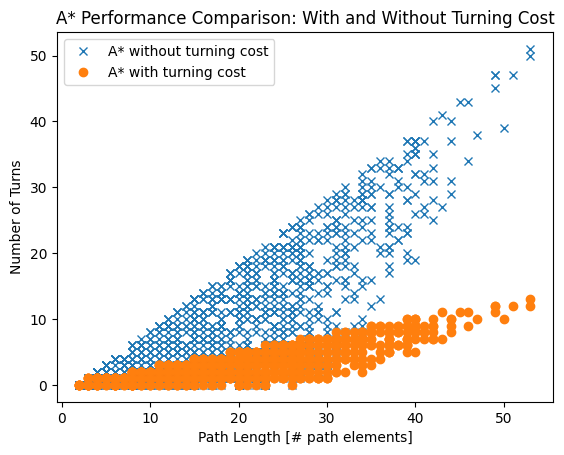

In [31]:
# Plotting the line chart
plt.plot(length, no_turning_cost, 'x', label='A* without turning cost')  # Red line with 'x' markers
plt.plot(length, turning_cost, 'o', label='A* with turning cost')   # Blue line with 'o' markers

# Adding labels and title
plt.xlabel('Path Length [# path elements]')
plt.ylabel('Number of Turns')
plt.title('A* Performance Comparison: With and Without Turning Cost')

# Show legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

In [ ]:
# A star for hexagon grid map

def astar_hex(maze, start, end, turning): # 0: no turning cost, 1: turning cost is considered
    STEP_COST = 1
    
    start_node = Node(None, start, (-1, 0)) #The AGV is facing down 
    start_node.g = start_node.f = start_node.h = start_node.t = 0
    
    end_node = Node(None, end) 
    end_node.g = end_node.h = end_node.f = end_node.t= 0
    
    open_list = []
    closed_list = []
    
    open_list.append(start_node)
    
    # start the searching loop
    while len(open_list) > 0:
        # get the current node (with the least f score)
        current_node = open_list[0]
        current_index = 0
        
        for index, node in enumerate(open_list):
            if node.f < current_node.f:
                current_node = node
                current_index = index
        
        # pop the current node out of the open list and add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)
        
        # check if the current node is the goal
        if current_node == end_node:
            path = [] # contain the path from start to end node
            
            while current_node is not None:
                
                path.append(current_node.position)
                current_node = current_node.parent
                
            return path[::-1]
        
        # Generate neighbor nodes from current node
        neighbors = []
    
        
        for new_position in [(0, 1),(0, -1),(1, 0),(-1, 0)]:
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            
            # check if the new node is out of bound
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue
            
            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue
            
            # Create new node
            new_node = Node(current_node, node_position, new_position) # New position is add for the current direction of that node

            neighbors.append(new_node)
            

        # Loop through children
        for neighbor in neighbors:
            if neighbor in closed_list:
                continue
            
            # Create the f, g, t and h values
            
            # Calculate turning cost 
            if (current_node.direction == neighbor.direction):
                neighbor.t = 0
            else: 
                neighbor.t = 1
                
            neighbor.g = current_node.g + STEP_COST
            neighbor.h = ((neighbor.position[0] - end_node.position[0])**2 + (neighbor.position[1] - end_node.position[1])**2)**0.5
            if (turning == 0):
                neighbor.f = neighbor.g + neighbor.h 
            else:
                neighbor.f = neighbor.g + neighbor.h + neighbor.t
                    
            # Skip if the neighbor is in the open list with a higher or equal f value
            if any(
                neighbor.position == open_node.position and neighbor.f >= open_node.f
                for open_node in open_list
            ):
                continue
                
            open_list.append(neighbor)
            
    return None # if no path is found